#Análisis exploratorio: Inmuebles Bogotá

Realizaremos un breve análisis exploratorio de una base de datos proporcionada por [Alura Latam](https://www.aluracursos.com/). En ella encontramos información acerca de diversos inmuebles ubicados en Bogotá.

No realizaremos ninguna limpieza.

In [33]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
inmuebles = pd.read_csv('/content/drive/MyDrive/alura/inmuebles_bogota.csv') 
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


La base de datos consiste de más de 9 mil muestras y cada una de ellas tiene 8 variables diferentes. Realizaremos estadística descriptiva de algunas de ellas.

In [36]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


##Área de los inmuebles

En promedio, ¿cuánto mide un inmueble en un barrio dado?


In [37]:
promedio_barrio = inmuebles.groupby('Barrio').mean()['Area']
promedio_barrio

Barrio
Alameda                97.000000
Alhambra              190.411765
Andes Norte           124.857143
Antonio Nariño        163.062500
Barrancas              70.200000
                         ...    
Villa Maria           207.153846
Villas De Granada      86.590909
Villemar               76.888889
Zona Franca            54.000000
Zona Noroccidental    135.785633
Name: Area, Length: 149, dtype: float64

Graficaremos el promedio de área para los 10 barrios que tienen el mayor promedio. Como podemos ver, el barrio de Modelia tiene, en promedio inmuebles con un área mucho mayor al resto

In [38]:
top_11 = promedio_barrio.sort_values()[-11:]
top_11

Barrio
Las Delicias              276.333333
Bellavista Occidental     286.200000
Veraguas                  302.666667
Santa Ana                 309.375000
Las Ferias                320.000000
Santa Librada             328.000000
Restrepo                  336.500000
La Soledad                378.625000
Bosa Piamonte             400.000000
Libertador                642.000000
Modelia                  4316.750000
Name: Area, dtype: float64

Como podemos observar esa diferencia se debe al inmueble 7073 que tiene un área de 166243 $m^{2}$. Posiblemente sea un dato erróneo.

In [39]:
inmuebles_modelia = inmuebles[inmuebles['Barrio']=='Modelia']
inmuebles_modelia

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
145,Casa,Casa en venta en Modelia,4,2,200,Modelia,Fontibón,$ 860.000.000
1283,Casa,Casa en venta en Modelia,8,4,236,Modelia,Fontibón,$ 1.120.000.000
1295,Apartamento,Apartamento en venta en Modelia,2,2,48,Modelia,Fontibón,$ 330.000.000
1363,Apartamento,Apartamento en venta en Modelia,3,2,53,Modelia,Fontibón,$ 287.000.000
1416,Apartamento,Apartamento en venta en Modelia,3,2,87,Modelia,Fontibón,$ 499.990.000
1665,Casa,Casa en venta en Modelia,3,2,106,Modelia,Fontibón,$ 470.000.000
2147,Casa,Casa en venta en Modelia,5,4,320,Modelia,Fontibón,$ 750.000.000
2160,Apartamento,Apartamento en venta en Modelia,3,2,78,Modelia,Fontibón,$ 620.000.000
2257,Casa,Casa en venta en Modelia,5,4,244,Modelia,Fontibón,$ 950.000.000
3092,Apartamento,Apartamento en venta en Modelia,3,3,108,Modelia,Fontibón,$ 670.000.000


Para realizar nuestro gráfico, eliminaremos Modelia

In [40]:
top_10 = top_11[:-1]

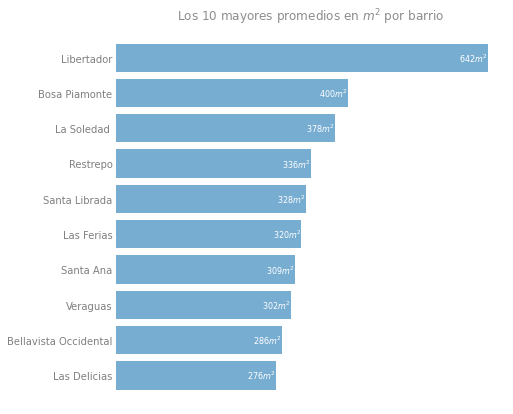

In [41]:
plt.figure(figsize=(7,7))

bars = plt.barh(top_10.index,top_10.values,alpha=.6)

plt.xticks(ticks=[])

plt.gca().tick_params(axis='y', which='both',length=0,labelcolor='gray')

plt.gca().set_frame_on(False)

plt.title('Los 10 mayores promedios en $m^{2}$ por barrio ', alpha=0.9,c='gray')

for bar in bars:
    plt.gca().text(bar.get_width()-50, bar.get_y()+.4, str(int(bar.get_width())) + '$m^2$', 
                 va='center', color='w', fontsize=8)


Para finalizar este breve análisis exploratorio calcularemos la matrix de correlation entre las variables de los inmuebles.

Para ello convertiremos la variable Valor a flotante.

In [42]:
inmuebles['Valor'] = inmuebles['Valor'].str.replace('$','',regex=True)
inmuebles['Valor'] = inmuebles['Valor'].str.replace('.','',regex=True)
inmuebles['Valor'] = inmuebles['Valor'].astype('float')

Como podemos observar la correlación entre el valor y el área es muy pequeña. Por lo tanto, podemos esperar que inmuebles pequeños cuesten mucho. Sin embargo, recordemos que hay algunos datos atípicos que parecen erróneos.

In [43]:
inmuebles.corr('pearson')['Valor']

Habitaciones    0.244292
Banos           0.590348
Area            0.057585
Valor           1.000000
Name: Valor, dtype: float64

Si eliminamos los inmuebles con área mayor que 10000 $m^{2}$, los resultados son más razonables, sin embargo, la correlación entre área y valor sigue siendo muy baja.

In [44]:
inmuebles_baja_area = inmuebles[inmuebles['Area']<10000]

In [45]:
inmuebles_baja_area.corr('pearson')['Valor']

Habitaciones    0.244308
Banos           0.590258
Area            0.418566
Valor           1.000000
Name: Valor, dtype: float64

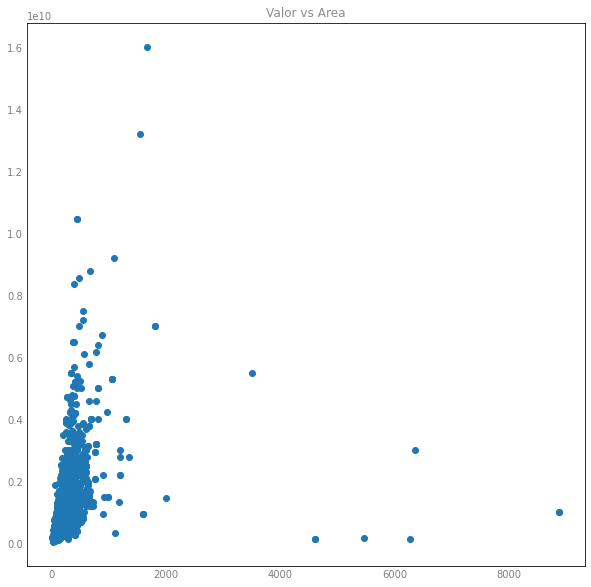

In [47]:
plt.figure(figsize=(10,10))

plt.gca().tick_params( which='both',length=0,labelcolor='gray')
plt.title('Valor vs Area', alpha=0.9,c='gray')

plt.scatter(inmuebles_baja_area.Area,inmuebles_baja_area.Valor)